# ITDS Final Exam

- Nama : Angela Hartono
- NIM : 2602059582

## Exploratory Data Analysis dan Visualisasi

In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [4]:
stroke = pd.read_csv('StrokeData.csv')

In [5]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke.info()

#stroke['smoking_status'].value_counts()
stroke['smoking_status'].value_counts().sort_values(ascending = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,count
smoking_status,
smokes,789
formerly smoked,885
Unknown,1544
never smoked,1892


In [7]:
#stroke.describe()
stroke['work_type'].describe()

,work_type
count,5110
unique,5
top,Private
freq,2925


In [8]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: ylabel='bmi'>

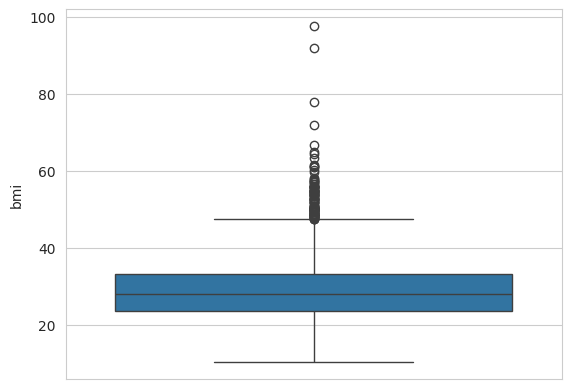

In [9]:
sns.boxplot(stroke['bmi'])

Terdapat beberapa outlier dengan nilai BMI di atas 45, bahkan mencapai 80-100. Ini mengindikasikan bahwa ada beberapa individu dengan nilai BMI yang sangat tinggi dibandingkan rata-rata populasi

In [10]:
stroke[stroke['bmi']<47]['bmi']

,bmi
0,36.6
2,32.5
3,34.4
4,24.0
5,29.0
...,...
5104,18.6
5106,40.0
5107,30.6
5108,25.6


<Axes: ylabel='bmi'>

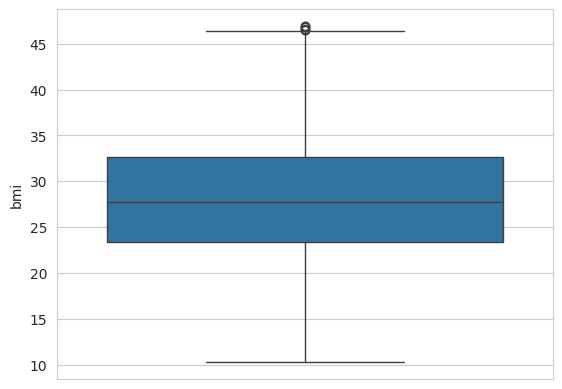

In [11]:
no_outliers = stroke[stroke['bmi']<47]['bmi']
sns.boxplot(no_outliers)

Terdapat beberapa outlier yang berada di atas batas atas, yaitu nilai BMI di atas sekitar 45

In [12]:
q1 = stroke['bmi'].quantile(0.25)
#mean = df1.quantile(0.5)
q3 = stroke['bmi'].quantile(0.75)

iqr = q3 - q1

#mencari nilai upperbound
upper = iqr+1.5*iqr

#mencari nilai lowerbound
lower = iqr-1.5*iqr

In [13]:
upper

24.000000000000004

Pada batas atas, itemukan pada nilai 24, yang digunakan untuk mendeteksi outlier di atas.

In [14]:
lower

-4.800000000000001

Pada batas bawah, ditemukan pada nilai -4.8, yang tidak masuk akal untuk BMI (karena BMI tidak mungkin negatif).

In [15]:
# Getting the percentage of missing values
missing_values =(stroke.isnull().sum()/stroke.shape[0] *100).sort_values(ascending= False)
missing_values

# ascending = false # urutan descending
# titanic.isnull.count

,0
bmi,3.933464
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000


In [16]:
stroke.loc[stroke.bmi > 47, 'bmi'] = np.nan
stroke.fillna(28.1,inplace=True)
stroke = stroke.drop(["ever_married","work_type","Residence_type"], axis=1)
stroke = stroke.drop(["id"], axis=1)
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.274188,0.048728
std,22.612647,0.296607,0.226063,45.283560,6.592216,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.300000,0.000000
max,82.000000,1.000000,1.000000,271.740000,46.900000,1.000000


In [17]:
stroke['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [18]:
# Getting the percentage of missing values
missing_values =(stroke.isnull().sum()/stroke.shape[0] *100).sort_values(ascending= False)
missing_values

#ascending = false #urutan descending
#titanic.isnull.count

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
avg_glucose_level,0.0
bmi,0.0
smoking_status,0.0
stroke,0.0


In [ ]:
# def is_holiday_adj(x):
#     if x == 'never smoked':
#         return 0
#     elif x== 'formerly smoked':
#         return 1
#     elif x == 'smokes':
#         return 2
#     elif x == 'Unknown':
#         return 3

# stroke['smoking_status'] = stroke['smoking_status'].apply(is_holiday_adj)
# stroke['smoking_status'].value_counts()

## Univariable Analysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

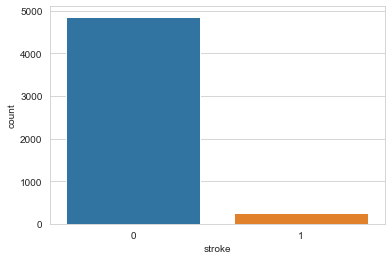

In [ ]:
sns.countplot(stroke['stroke'])

- Bar chart di atas menampilkan jumlah individu yang mengalami stroke (stroke = 1) dibandingkan dengan yang tidak mengalami stroke (stroke = 0).

- Dari visualisasi tersebut, terlihat bahwa jumlah individu yang tidak mengalami stroke jauh lebih banyak daripada mereka yang mengalami stroke. Ini dapat menunjukkan bahwa dataset tidak seimbang (imbalance), dimana sebagian besar data adalah kasus non-stroke. Hal ini bisa menjadi masalah ketika melakukan prediksi karena model cenderung lebih fokus pada kelas mayoritas (yaitu non-stroke).

## Bi-variate Analysis

In [19]:
stroke.groupby(['smoking_status', 'stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

- Data di atas dipecah berdasarkan empat kategori status merokok (Unknown, formerly smoked, never smoked, smokes) dan apakah individu mengalami stroke (stroke = 1) atau tidak (stroke = 0).
- Hasilnya menunjukkan distribusi antara status merokok dan kejadian stroke. Beberapa insight yang dapat diambil:
  - Pada kategori Unknown, terdapat 1497 individu yang tidak mengalami stroke, sementara 47 individu mengalami stroke.
   - Untuk kategori formerly smoked, ada 815 individu yang tidak mengalami stroke dan 70 individu mengalami stroke.
  - Pada kategori never smoked, 1802 individu tidak mengalami stroke, sementara hanya 90 yang mengalami stroke.
  - Pada kategori smokes, ada 747 individu yang tidak mengalami stroke dan 42 individu yang mengalami stroke.
- Dari hasil ini, bisa terlihat bahwa baik kategori perokok maupun bukan perokok memiliki jumlah kejadian stroke yang lebih kecil dibandingkan dengan yang tidak mengalami stroke. Namun, hal ini juga bisa menunjukkan adanya ketidakseimbangan yang lebih besar untuk kategori perokok yang mengalami stroke.

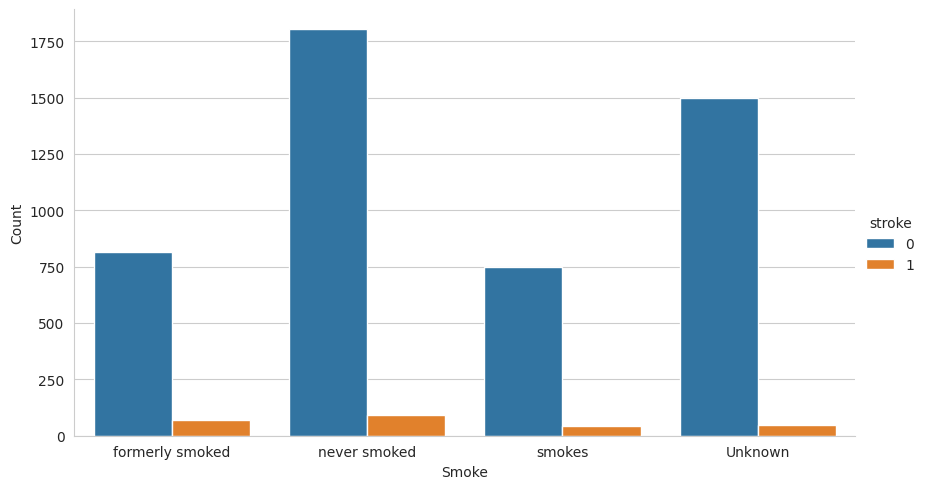

In [20]:
g = sns.catplot(x='smoking_status', data=stroke, hue='stroke', kind='count', aspect=1.75)
g.set_axis_labels('Smoke', 'Count')

plt.show()

Penjelasan Grafik:
- Visualisasi ini merupakan count plot yang mengelompokkan individu berdasarkan status merokok: 'formerly smoked', 'never smoked', 'smokes', dan 'Unknown'.
- Bar chart berwarna biru menunjukkan jumlah individu yang tidak mengalami stroke (stroke=0), sedangkan bar chart berwarna oranye menunjukkan jumlah individu yang mengalami stroke (stroke=1).

Insight dari Visualisasi:
- Kategori 'never smoked' dan 'Unknown' memiliki jumlah individu paling banyak.
- Secara umum, jumlah individu yang mengalami stroke jauh lebih sedikit dibandingkan dengan yang tidak mengalami stroke, terlepas dari status merokok. Ini menunjukkan bahwa status merokok mungkin merupakan salah satu faktor yang berpengaruh, tetapi tidak satu-satunya.
- Pada kategori 'formerly smoked' dan 'smokes', terlihat bahwa orang yang mengalami stroke lebih sedikit dibandingkan yang tidak mengalami stroke, tetapi masih ada kejadian stroke pada semua kategori merokok.

## Multivariate Analysis

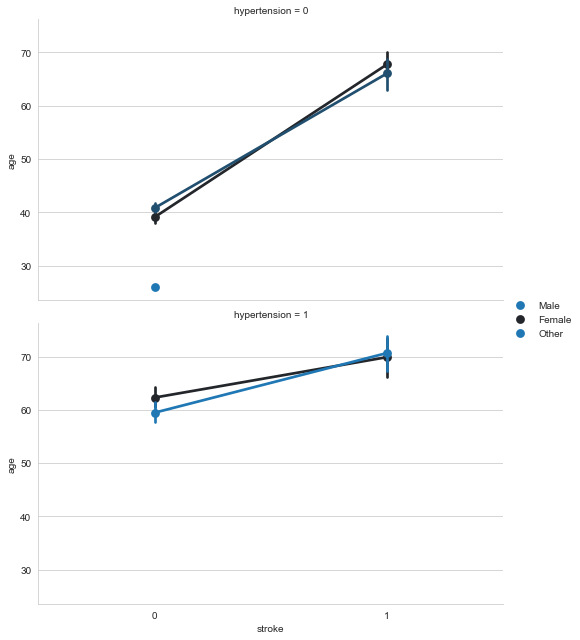

In [ ]:
# Menggunakan FacetGrid untuk memvisualisasikan hubungan multivariate
FacetGrid = sns.FacetGrid(stroke, row='hypertension', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'stroke', 'age', 'gender', order=None, hue_order=None)
FacetGrid.add_legend()

plt.show()

Penjelasan Grafik:
- Grafik ini dipisahkan menjadi dua bagian:
  - Bagian atas (hypertension = 0) menampilkan individu yang tidak memiliki hipertensi.
  - Bagian bawah (hypertension = 1) menampilkan individu yang memiliki hipertensi.
- Sumbu x (stroke) menunjukkan apakah seseorang mengalami stroke (0 atau 1), sedangkan sumbu y (age) menunjukkan rata-rata usia.
- Garis menunjukkan perbedaan rata-rata usia antara gender (Male, Female, Other) pada kondisi stroke/non-stroke.

Insight dari Visualisasi:
- Pada grafik hypertension = 0, rata-rata usia individu yang mengalami stroke sedikit lebih tinggi dibandingkan dengan yang tidak mengalami stroke, baik untuk laki-laki maupun perempuan.
- Pada grafik hypertension = 1, rata-rata usia untuk individu yang mengalami stroke juga lebih tinggi dibandingkan dengan yang tidak mengalami stroke. Hal ini menunjukkan bahwa hipertensi mungkin menjadi faktor risiko yang signifikan bagi individu yang lebih tua untuk mengalami stroke.
- Perbedaan jenis kelamin (gender) juga memberikan wawasan tambahan, namun dalam grafik ini, pengaruhnya tidak begitu jelas, karena tren untuk laki-laki dan perempuan tampak mirip.

In [21]:
# Memilih hanya kolom numerik
numeric_data = stroke.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi
corr = numeric_data.corr(method='pearson')

# Menampilkan hasil korelasi
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.374047,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.149401,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.060933,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.167873,0.131945
bmi,0.374047,0.149401,0.060933,0.167873,1.000000,0.052886
stroke,0.245257,0.127904,0.134914,0.131945,0.052886,1.000000


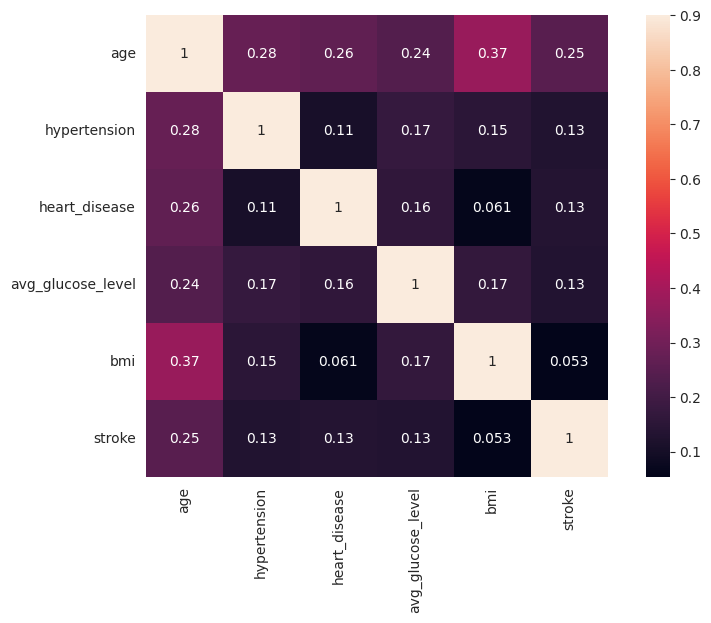

In [22]:
# Membuat heatmap dari korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmax=0.9, square=True, annot=True)
plt.show()

Korelasi diukur menggunakan metode Pearson, yang menunjukkan seberapa kuat dan arah hubungan linier antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, dimana:
- Nilai 1 menunjukkan korelasi positif sempurna.
- Nilai -1 menunjukkan korelasi negatif sempurna.
- Nilai 0 menunjukkan tidak adanya hubungan linier antara variabel.

Pada tabel korelasi dan heatmap, berikut adalah beberapa observasi penting terkait nilai korelasi antara variabel-variabel dalam dataset:
1. age (Usia) dan bmi (Body Mass Index):
  - Korelasi antara age dan bmi adalah 0.37, yang menunjukkan korelasi positif yang cukup lemah hingga sedang.
  - Ini berarti bahwa ketika usia meningkat, BMI juga cenderung meningkat, meskipun korelasinya tidak terlalu kuat.

2. age dan stroke:
  - Korelasi antara age dan stroke adalah 0.25, yang menunjukkan korelasi positif lemah.
  - Hal ini menunjukkan bahwa semakin tua seseorang, terdapat sedikit peningkatan kemungkinan mengalami stroke. Namun, korelasi ini tidak terlalu kuat.

3. hypertension (Hipertensi) dan stroke:
  - Korelasi antara hypertension dan stroke adalah 0.13, yang menunjukkan hubungan positif yang sangat lemah.
  - Ini mengindikasikan bahwa individu dengan hipertensi sedikit lebih mungkin mengalami stroke, tetapi pengaruhnya tidak besar.

4. heart_disease (Penyakit Jantung) dan stroke:
  - Korelasi antara heart_disease dan stroke adalah 0.13, menunjukkan korelasi positif yang sangat lemah.
  - Ini mengindikasikan bahwa adanya penyakit jantung berhubungan sedikit dengan kemungkinan stroke, tetapi hubungan ini juga lemah.

5. avg_glucose_level (Rata-rata Gula Darah) dan stroke:
  - Korelasi antara avg_glucose_level dan stroke adalah 0.13, menunjukkan hubungan yang lemah antara kadar gula darah dan kejadian stroke.
  - Ini berarti bahwa rata-rata gula darah yang tinggi sedikit terkait dengan kejadian stroke, tetapi tidak terlalu signifikan.

6. bmi dan stroke:
  - Korelasi antara bmi dan stroke adalah 0.053, yang sangat lemah dan hampir tidak signifikan.
  - Hal ini menunjukkan bahwa BMI tidak banyak berhubungan dengan kemungkinan mengalami stroke dalam dataset ini.

7. age dan hypertension:
  - Korelasi antara age dan hypertension adalah 0.28, menunjukkan korelasi lemah hingga sedang.
  - Ini berarti bahwa usia cenderung berhubungan dengan risiko hipertensi, meskipun tidak sangat kuat.




- Korelasi yang Lemah dengan stroke:
  - Hampir semua variabel (age, hypertension, heart_disease, avg_glucose_level, dan bmi) memiliki korelasi yang lemah dengan kejadian stroke. Tidak ada satu pun variabel dengan korelasi yang sangat kuat dengan stroke.
  - Korelasi lemah ini dapat mengindikasikan bahwa faktor-faktor lain, atau kombinasi dari variabel-variabel ini, mungkin berperan penting dalam memprediksi kejadian stroke. Analisis yang lebih mendalam atau penggunaan model statistik yang lebih kompleks mungkin diperlukan untuk memahami hubungan yang lebih baik.

- Korelasi antara Variabel Lain:
  - age memiliki korelasi yang cukup kuat dengan bmi (0.37) dan korelasi yang lemah hingga sedang dengan hypertension (0.28), menunjukkan bahwa usia cenderung berhubungan dengan peningkatan BMI dan risiko hipertensi.

## Kesimpulan dan Penanganan Selanjutnya

- Tidak adanya korelasi yang sangat kuat dengan stroke, mungkin diperlukan pendekatan lebih lanjut untuk menganalisis data ini, seperti menggunakan model machine learning untuk mengeksplorasi kombinasi dari variabel-variabel yang ada.
- Feature Engineering mungkin diperlukan untuk mencoba menciptakan fitur baru yang lebih relevan untuk model prediksi stroke.
- Bisa juga dengan metode non-linear dengan random forest atau lainnya yang mungkin lebih cocok untuk menemukan hubungan kompleks antar variabel.